## Bank Customer Satisfaction Prediction Using CNN and Feature Selection

In [1]:
!pip install tensorflow-gpu==2.0.0-rc0

     |████████████████████████████████| 380.5MB 70kB/s 
     |████████████████████████████████| 4.3MB 32.4MB/s 
     |████████████████████████████████| 501kB 54.0MB/s 


In [1]:
import tensorflow as tf
from tensorflow.keras import Sequential

In [2]:
from tensorflow.keras.layers import Conv1D, MaxPool1D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
print(tf.__version__)

2.0.0-rc0


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold

In [9]:
#Dataset Link: https://github.com/laxmimerit/Data-Files-for-Feature-Selection

In [6]:
!git clone https://github.com/laxmimerit/Data-Files-for-Feature-Selection.git

'git' is not recognized as an internal or external command,
operable program or batch file.


In [11]:
data = pd.read_csv('santander-train.csv')
data.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [12]:
data.shape

(76020, 371)

In [13]:
X = data.drop(labels=['ID', 'TARGET'], axis = 1)
X.shape

(76020, 369)

In [14]:
y = data['TARGET']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0, stratify = y)

In [16]:
X_train.shape, X_test.shape

((60816, 369), (15204, 369))

### Remove Constant, Quasi Constant and Duplicate Features

In [17]:
filter = VarianceThreshold(0.01)
X_train = filter.fit_transform(X_train)
X_test = filter.transform(X_test)

X_train.shape, X_test.shape

((60816, 273), (15204, 273))

In [18]:
389-273

116

In [19]:
X_train_T = X_train.T
X_test_T = X_test.T

In [20]:
X_train_T = pd.DataFrame(X_train_T)
X_test_T = pd.DataFrame(X_test_T)

In [21]:
X_train_T.shape

(273, 60816)

In [22]:
X_train_T.duplicated().sum()

17

In [23]:
duplicated_features = X_train_T.duplicated()
duplicated_features

0      False
1      False
2      False
3      False
4      False
       ...  
268    False
269    False
270    False
271    False
272    False
Length: 273, dtype: bool

In [24]:
features_to_keep = [not index for index in duplicated_features]
features_to_keep

[True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 Tru

In [25]:
X_train = X_train_T[features_to_keep].T
X_train.shape

(60816, 256)

In [26]:
X_test = X_test_T[features_to_keep].T
X_test.shape

(15204, 256)

In [27]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,263,264,265,266,267,268,269,270,271,272
0,2.0,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016
1,2.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,85472.340000
2,2.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,317769.240000
3,2.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,76209.960000
4,2.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,302754.000000


In [28]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [29]:
X_train

array([[ 3.80478472e-02, -5.56029626e-01, -5.27331414e-02, ...,
        -1.87046327e-02, -1.97720391e-02,  3.12133758e-03],
       [ 3.80478472e-02, -7.87181903e-01, -5.27331414e-02, ...,
        -1.87046327e-02, -1.97720391e-02, -1.83006062e-01],
       [ 3.80478472e-02, -7.87181903e-01, -5.27331414e-02, ...,
        -1.87046327e-02, -1.97720391e-02,  1.17499225e+00],
       ...,
       [ 3.80478472e-02,  5.99731758e-01, -5.27331414e-02, ...,
        -1.87046327e-02, -1.97720391e-02, -2.41865113e-01],
       [ 3.80478472e-02, -1.70775831e-01, -5.27331414e-02, ...,
        -1.87046327e-02, -1.97720391e-02,  3.12133758e-03],
       [ 3.80478472e-02,  2.91528722e-01,  7.65192053e+00, ...,
        -1.87046327e-02, -1.97720391e-02,  3.12133758e-03]])

In [30]:
X_train.shape, X_test.shape

((60816, 256), (15204, 256))

In [31]:
X_train = X_train.reshape(60816, 256,1)
X_test = X_test.reshape(15204, 256, 1)

In [32]:
X_train.shape, X_test.shape

((60816, 256, 1), (15204, 256, 1))

In [33]:
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [34]:
## Build CNN

In [35]:
model = Sequential()
model.add(Conv1D(32, 3, activation='relu', input_shape = (256,1)))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.3))

model.add(Conv1D(64, 3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.5))

model.add(Conv1D(128, 3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))


In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 254, 32)           128       
_________________________________________________________________
batch_normalization (BatchNo (None, 254, 32)           128       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 127, 32)           0         
_________________________________________________________________
dropout (Dropout)            (None, 127, 32)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 125, 64)           6208      
_________________________________________________________________
batch_normalization_1 (Batch (None, 125, 64)           256       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 62, 64)            0

In [37]:
model.compile(optimizer=Adam(lr=0.00005), loss='binary_crossentropy', metrics=['accuracy'])

In [38]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), verbose=1)

Train on 60816 samples, validate on 15204 samples
Epoch 1/10
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
60816/60816 [==============================] - 106s 2ms/sample - loss: 0.2285 - accuracy: 0.9515 - val_loss: 0.1779 - val_accuracy: 0.9595
Epoch 2/10
60816/60816 [==============================] - 103s 2ms/sample - loss: 0.1766 - accuracy: 0.9592 - val_loss: 0.1846 - val_accuracy: 0.9603
Epoch 3/10
60816/60816 [==============================] - 102s 2ms/sample - loss: 0.1685 - accuracy: 0.9601 - val_loss: 0.1700 - val_accuracy: 0.9604
Epoch 4/10
60816/60816 [==============================] - 104s 2ms/sample - loss: 0.1649 - accuracy: 0.9603 - val_loss: 0.1700 - val_accuracy: 0.9604
Epoch 5/10
60816/60816 [==============================] - 104s 2ms/sample - loss: 0.1643 - accuracy: 0.9604 - val_loss: 0.1717 - val_accuracy: 0.9604
Epoch 6/10
60816/60816 [==============================] - 103s 2ms/sample - loss: 0.1610 - accuracy: 0.960

In [39]:
history.history

{'loss': [0.22847500250774508,
  0.1766334789957272,
  0.16848765169994373,
  0.16492484529252524,
  0.1643374677697504,
  0.16104294428387714,
  0.1583571621510613,
  0.15569439685078507,
  0.15466511619180026,
  0.15385652103766867],
 'accuracy': [0.9514766,
  0.9591555,
  0.9601092,
  0.9602901,
  0.96037227,
  0.960438,
  0.9603887,
  0.960438,
  0.9604216,
  0.960438],
 'val_loss': [0.17786199324983604,
  0.18461217223359108,
  0.1699978479166324,
  0.170009176572454,
  0.1717346797696511,
  0.17995763056311473,
  0.16620316930944373,
  0.16200926306372535,
  0.17063950625917404,
  0.16558565535053113],
 'val_accuracy': [0.95948434,
  0.96033937,
  0.9604052,
  0.9604052,
  0.9604052,
  0.9604052,
  0.9604052,
  0.9604052,
  0.9604052,
  0.9602736]}

In [40]:
def plot_learningCurve(history, epoch):
  # Plot training & validation accuracy values
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

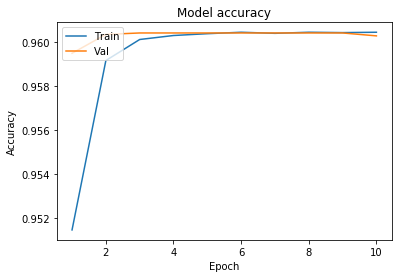

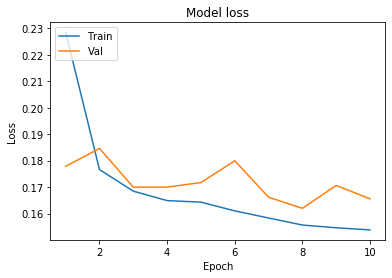

In [41]:
plot_learningCurve(history, 10)